<a href="https://colab.research.google.com/github/sidheart0960/google-collab/blob/main/student_mental_health_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.graph_objs as go
import plotly.express as px
plt.style.use('seaborn-dark')
plt.style.context('grayscale')
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS



<ipython-input-2-fa55eb3f0acf>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


In [3]:
df=pd.read_csv("/content/drive/MyDrive/Student Mental health.csv")

In [4]:
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [5]:
df.isnull().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [ ]:
df.Age.mean()

In [7]:
df.Age.fillna("21", inplace=True)

In [6]:
df.Age.isnull().sum()

1

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Timestamp                                     101 non-null    object
 1   Choose your gender                            101 non-null    object
 2   Age                                           101 non-null    object
 3   What is your course?                          101 non-null    object
 4   Your current year of Study                    101 non-null    object
 5   What is your CGPA?                            101 non-null    object
 6   Marital status                                101 non-null    object
 7   Do you have Depression?                       101 non-null    object
 8   Do you have Anxiety?                          101 non-null    object
 9   Do you have Panic attack?                     101 non-null    object
 10  Di

In [9]:
df.shape

(101, 11)

In [10]:
df.rename(columns = {'Choose your gender':'Choose_your_gender',
                     'What is your course?':'What_is_your_course',
                     'Your current year of Study':'Your_current_year_of_Study',
                     'What is your CGPA?':'What_is_your_CGPA',
                     'Marital status':'Marital_status',
                     'Do you have Depression?':'Do_you_have_Depression',
                     'Do you have Anxiety?':'Do_you_have_Anxiety',
                     'Do you have Panic attack?':'Do_you_have_Panic_attack',
                     'Did you seek any specialist for a treatment?':'Did_you_seek_any_specialist_for_a_treatment'}, inplace = True)

In [11]:
df.head()

,Timestamp,Choose_your_gender,Age,What_is_your_course,Your_current_year_of_Study,What_is_your_CGPA,Marital_status,Do_you_have_Depression,Do_you_have_Anxiety,Do_you_have_Panic_attack,Did_you_seek_any_specialist_for_a_treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


<Axes: xlabel='Your_current_year_of_Study'>

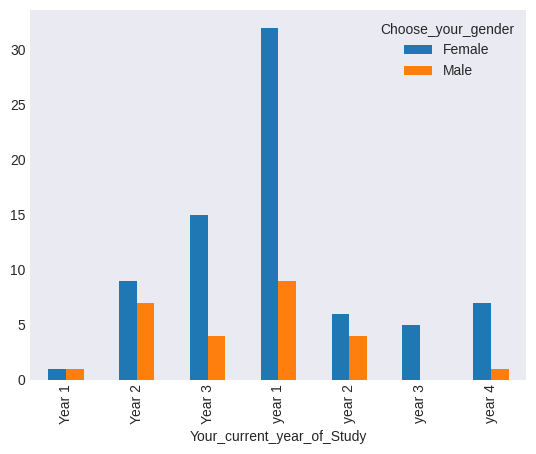

In [12]:
# @title Gender Distribution by Year of Study

df.groupby(['Your_current_year_of_Study', 'Choose_your_gender']).size().unstack().plot(kind='bar')

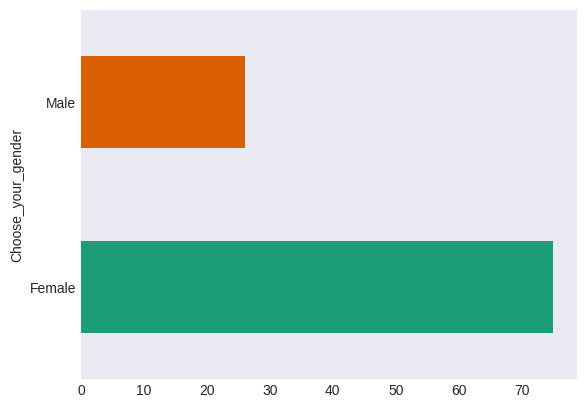

In [13]:
# @title Choose_your_gender

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Choose_your_gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [14]:
df['Date'] = pd.to_datetime(df['Timestamp'], errors='coerce')
df['day'] = (df['Date']).dt.day
df['month'] = (df['Date']).dt.month
df['year'] = (df['Date']).dt.year
df['hour'] = (df['Date']).dt.hour

In [15]:
df.head()

,Timestamp,Choose_your_gender,Age,What_is_your_course,Your_current_year_of_Study,What_is_your_CGPA,Marital_status,Do_you_have_Depression,Do_you_have_Anxiety,Do_you_have_Panic_attack,Did_you_seek_any_specialist_for_a_treatment,Date,day,month,year,hour
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No,2020-08-07 12:02:00,7.0,8.0,2020.0,12.0
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No,2020-08-07 12:04:00,7.0,8.0,2020.0,12.0
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No,2020-08-07 12:05:00,7.0,8.0,2020.0,12.0
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No,2020-08-07 12:06:00,7.0,8.0,2020.0,12.0
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No,2020-08-07 12:13:00,7.0,8.0,2020.0,12.0


In [16]:
df.year.value_counts()

year
2020.0    78
Name: count, dtype: int64

In [17]:
df.day.value_counts()

day
7.0    78
Name: count, dtype: int64

In [18]:
fig = px.histogram(df, x="day", color="day")
fig.show()

In [19]:
df.month.value_counts()

month
8.0    73
9.0     5
Name: count, dtype: int64

In [20]:
fig = px.histogram(df, x="month", color="month")
fig.show()

In [21]:
df.hour.value_counts()

hour
12.0    18
14.0    14
15.0    13
13.0    12
16.0     6
17.0     4
18.0     3
19.0     2
11.0     2
20.0     1
21.0     1
22.0     1
6.0      1
Name: count, dtype: int64

In [22]:
fig = px.histogram(df, x="hour", color="hour")
fig.show()

In [23]:
df.Choose_your_gender.value_counts()

Choose_your_gender
Female    75
Male      26
Name: count, dtype: int64

In [24]:
fig = px.histogram(df, x="Choose_your_gender", color="Choose_your_gender")
fig.show()

In [25]:
df.Age.value_counts()

Age
18.0    32
24.0    23
19.0    21
23.0    13
20.0     6
21.0     3
22.0     2
21       1
Name: count, dtype: int64

In [26]:
fig = px.histogram(df, x="Age", color="Age")
fig.show()

In [28]:
df.What_is_your_course.value_counts()

What_is_your_course
BCS                        18
Engineering                17
BIT                        10
Biomedical science          4
KOE                         4
BENL                        2
Laws                        2
psychology                  2
Engine                      2
Islamic Education           1
Biotechnology               1
engin                       1
Econs                       1
MHSC                        1
Malcom                      1
Kop                         1
Human Sciences              1
Communication               1
Nursing                     1
Diploma Nursing             1
IT                          1
Pendidikan Islam            1
Radiography                 1
Fiqh fatwa                  1
DIPLOMA TESL                1
Koe                         1
Fiqh                        1
CTS                         1
koe                         1
Benl                        1
Kirkhs                      1
Mathemathics                1
Pendidikan islam    

In [ ]:
fig = px.histogram(df, x="What_is_your_course", color="What_is_your_course")
fig.show()

In [29]:
df.head()

,Timestamp,Choose_your_gender,Age,What_is_your_course,Your_current_year_of_Study,What_is_your_CGPA,Marital_status,Do_you_have_Depression,Do_you_have_Anxiety,Do_you_have_Panic_attack,Did_you_seek_any_specialist_for_a_treatment,Date,day,month,year,hour
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No,2020-08-07 12:02:00,7.0,8.0,2020.0,12.0
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No,2020-08-07 12:04:00,7.0,8.0,2020.0,12.0
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No,2020-08-07 12:05:00,7.0,8.0,2020.0,12.0
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No,2020-08-07 12:06:00,7.0,8.0,2020.0,12.0
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No,2020-08-07 12:13:00,7.0,8.0,2020.0,12.0


In [ ]:
df.loc[(df['Your_current_year_of_Study'] =="Year 3"), 'Your_current_year_of_Study'] = 'year 3'
df.loc[(df['Your_current_year_of_Study'] =="Year 2"), 'Your_current_year_of_Study'] = 'year 2'
df.loc[(df['Your_current_year_of_Study'] =="Year 1"), 'Your_current_year_of_Study'] = 'year 1'

In [ ]:
df.Your_current_year_of_Study.value_counts()

In [30]:
fig = px.histogram(df, x="Your_current_year_of_Study", color="Your_current_year_of_Study")
fig.show()

In [31]:
df.What_is_your_CGPA.value_counts()

What_is_your_CGPA
3.50 - 4.00     47
3.00 - 3.49     43
2.50 - 2.99      4
0 - 1.99         4
2.00 - 2.49      2
3.50 - 4.00      1
Name: count, dtype: int64

In [34]:
fig = px.histogram(df, x="What_is_your_CGPA", color="What_is_your_CGPA")
fig.show()

In [32]:
df.Marital_status.value_counts()

Marital_status
No     85
Yes    16
Name: count, dtype: int64

In [33]:
fig = px.histogram(df, x="Marital_status", color="Marital_status")
fig.show()

In [36]:
df.Do_you_have_Depression.value_counts()

Do_you_have_Depression
No     66
Yes    35
Name: count, dtype: int64

In [35]:
fig = px.histogram(df, x="Do_you_have_Depression", color="Do_you_have_Depression")
fig.show()

In [37]:
df.head()

,Timestamp,Choose_your_gender,Age,What_is_your_course,Your_current_year_of_Study,What_is_your_CGPA,Marital_status,Do_you_have_Depression,Do_you_have_Anxiety,Do_you_have_Panic_attack,Did_you_seek_any_specialist_for_a_treatment,Date,day,month,year,hour
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No,2020-08-07 12:02:00,7.0,8.0,2020.0,12.0
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No,2020-08-07 12:04:00,7.0,8.0,2020.0,12.0
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No,2020-08-07 12:05:00,7.0,8.0,2020.0,12.0
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No,2020-08-07 12:06:00,7.0,8.0,2020.0,12.0
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No,2020-08-07 12:13:00,7.0,8.0,2020.0,12.0


In [38]:
df.Do_you_have_Anxiety.value_counts()

Do_you_have_Anxiety
No     67
Yes    34
Name: count, dtype: int64

In [39]:
fig = px.histogram(df, x="Do_you_have_Anxiety", color="Do_you_have_Anxiety")
fig.show()

In [40]:
df.Do_you_have_Panic_attack.value_counts()

Do_you_have_Panic_attack
No     68
Yes    33
Name: count, dtype: int64

In [41]:
fig = px.histogram(df, x="Do_you_have_Panic_attack", color="Do_you_have_Panic_attack")
fig.show()

In [42]:
df.Did_you_seek_any_specialist_for_a_treatment.value_counts()

Did_you_seek_any_specialist_for_a_treatment
No     95
Yes     6
Name: count, dtype: int64

In [43]:
fig = px.histogram(df, x="Did_you_seek_any_specialist_for_a_treatment", color="Did_you_seek_any_specialist_for_a_treatment")
fig.show()

In [44]:
df.head()

,Timestamp,Choose_your_gender,Age,What_is_your_course,Your_current_year_of_Study,What_is_your_CGPA,Marital_status,Do_you_have_Depression,Do_you_have_Anxiety,Do_you_have_Panic_attack,Did_you_seek_any_specialist_for_a_treatment,Date,day,month,year,hour
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No,2020-08-07 12:02:00,7.0,8.0,2020.0,12.0
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No,2020-08-07 12:04:00,7.0,8.0,2020.0,12.0
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No,2020-08-07 12:05:00,7.0,8.0,2020.0,12.0
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No,2020-08-07 12:06:00,7.0,8.0,2020.0,12.0
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No,2020-08-07 12:13:00,7.0,8.0,2020.0,12.0


In [46]:
fig = px.histogram(df, x="Do_you_have_Depression",
             color='Did_you_seek_any_specialist_for_a_treatment', barmode='group',
             height=400)
fig.show()

In [45]:
fig = px.histogram(df, x="Do_you_have_Anxiety",
             color='Did_you_seek_any_specialist_for_a_treatment', barmode='group',
             height=400)
fig.show()

In [48]:
fig = px.histogram(df, x="Do_you_have_Panic_attack",
             color='Did_you_seek_any_specialist_for_a_treatment', barmode='group',
             height=400)
fig.show()

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 16 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Timestamp                                    101 non-null    object        
 1   Choose_your_gender                           101 non-null    object        
 2   Age                                          101 non-null    object        
 3   What_is_your_course                          101 non-null    object        
 4   Your_current_year_of_Study                   101 non-null    object        
 5   What_is_your_CGPA                            101 non-null    object        
 6   Marital_status                               101 non-null    object        
 7   Do_you_have_Depression                       101 non-null    object        
 8   Do_you_have_Anxiety                          101 non-null    object        
 9  

In [49]:
fig = px.box(df, x="Choose_your_gender", y="Age",color="Choose_your_gender", notched=True, # used notched shape
             title="Box plot of Gender",)
fig.show()

In [50]:
fig = px.box(df, x="Marital_status", y="Age",color="Marital_status", notched=True, # used notched shape
             title="Box plot of status")
fig.show()

In [51]:
fig = px.box(df, x="Your_current_year_of_Study", y="Age",color="Your_current_year_of_Study", notched=True, # used notched shape
             title="Box plot of study",)
fig.show()